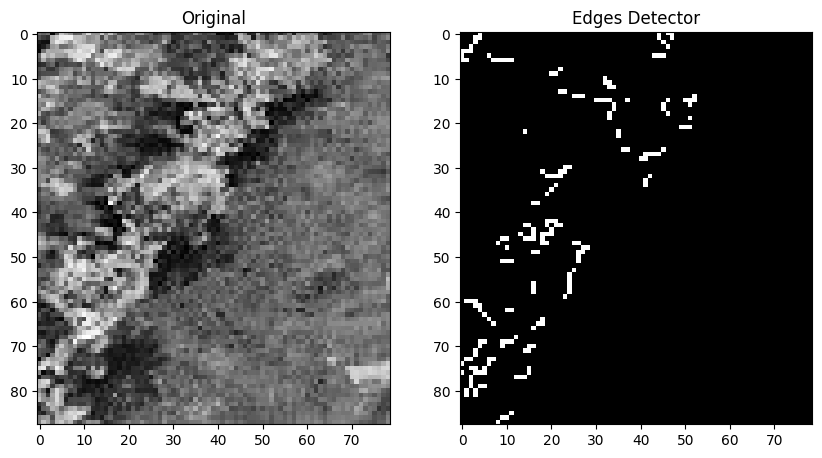

In [36]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img,550,690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Edges Detector")
plt.show()

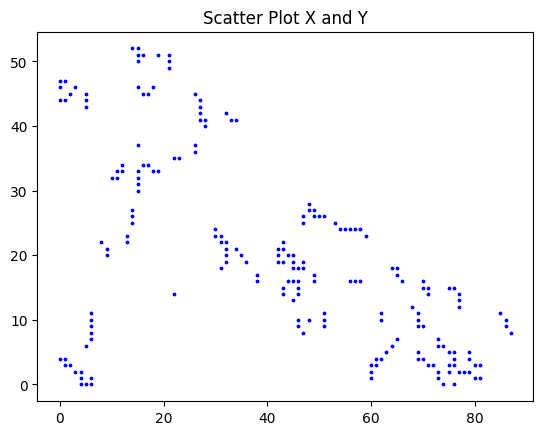

In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img,550,690)
indices = np.where(edges != [0])
x = indices[0]
y = indices[1]

plt.scatter(x,y, c='blue',s=3)
plt.title('Scatter Plot X and Y')
plt.show()

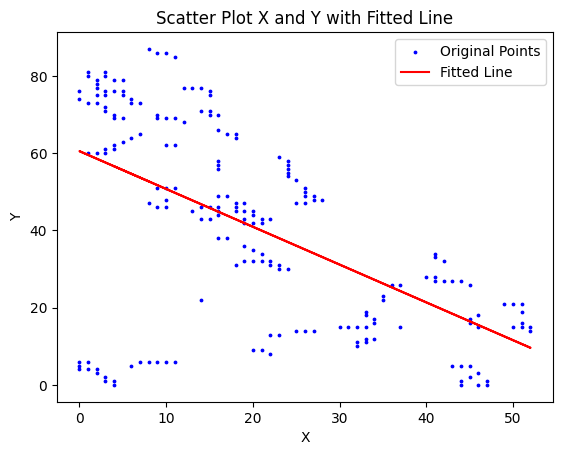

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img, 550, 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

m = np.polyfit(x, y, 1)
fitted_line = np.poly1d(m)

fitted_y = fitted_line(x)

plt.scatter(x, y, c='blue', s=3, label='Original Points')
plt.plot(x, fitted_y, c='red', label='Fitted Line')
plt.title('Scatter Plot X and Y with Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img, 550, 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

m = np.polyfit(x, y, 1)

fitted_line = np.polyfit(x, y, 1)
angle = np.arctan(fitted_line[0]) * 180 / np.pi

print(f"Estimated angle of the crop field: {angle:.2f} degrees")

Estimated angle of the crop field: -44.39 degrees


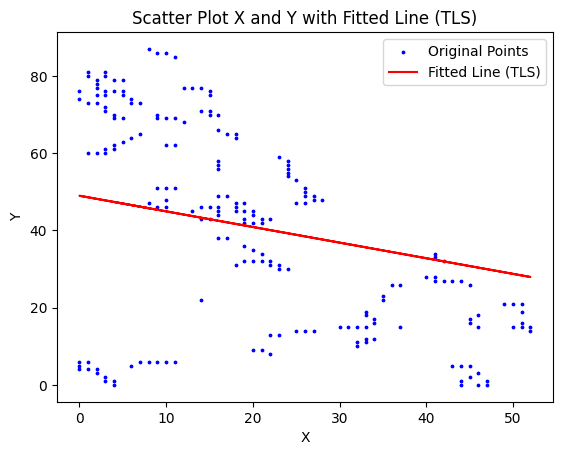

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img, 550, 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

data = np.vstack([x, y]).T
centroid = np.mean(data, axis=0)
data_centered = data - centroid
U, S, Vt = np.linalg.svd(data_centered, full_matrices=False)
slope = -Vt[0, 0] / Vt[1, 0]
intercept = centroid[1] - slope * centroid[0]

fitted_y_tls = slope * x + intercept

plt.scatter(x, y, c='blue', s=3, label='Original Points')
plt.plot(x, fitted_y_tls, c='red', label='Fitted Line (TLS)')
plt.title('Scatter Plot X and Y with Fitted Line (TLS)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [55]:
import cv2 as cv
import numpy as np

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img, 550, 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

data = np.vstack([x, y]).T
centroid = np.mean(data, axis=0)
data_centered = data - centroid
U, S, Vt = np.linalg.svd(data_centered, full_matrices=False)
slope = -Vt[0, 0] / Vt[1, 0]

angle_radians = np.arctan(slope)
angle_degrees = np.degrees(angle_radians)
print("Angle of the TLS fitted line:", angle_degrees)


Angle of the TLS fitted line: -22.026565186321758


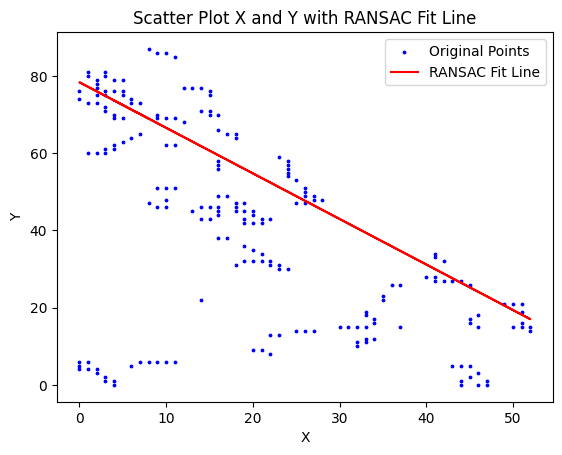

In [53]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img, 550, 690)

indices = np.where(edges != 0)
x = indices[1]
y = indices[0]
points = np.column_stack((x, y))

iterations = 1000
sample_size = 2
inlier_threshold = 5

best_model = None
best_inliers = []

for _ in range(iterations):
    sample_indices = np.random.choice(len(points), sample_size, replace=False)
    sample_points = points[sample_indices]

    x1, y1 = sample_points[0]
    x2, y2 = sample_points[1]
    if x2 - x1 != 0:
        model_slope = (y2 - y1) / (x2 - x1)
        model_intercept = y1 - model_slope * x1

        distances = np.abs(points[:, 1] - model_slope * points[:, 0] - model_intercept)

        inliers = points[distances < inlier_threshold]
        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            best_model = (model_slope, model_intercept)

x_inliers = best_inliers[:, 0]
y_inliers = best_inliers[:, 1]
m, c = np.polyfit(x_inliers, y_inliers, 1)
fitted_y = m * x + c

plt.scatter(x, y, c='blue', s=3, label='Original Points')
plt.plot(x, fitted_y, c='red', label='RANSAC Fit Line')
plt.title('Scatter Plot X and Y with RANSAC Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [52]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img, 550, 690)

indices = np.where(edges != 0)
x = indices[1]
y = indices[0]
points = np.column_stack((x, y))

iterations = 1000
sample_size = 2
inlier_threshold = 5

best_model = None
best_inliers = []

for _ in range(iterations):
    sample_indices = np.random.choice(len(points), sample_size, replace=False)
    sample_points = points[sample_indices]

    x1, y1 = sample_points[0]
    x2, y2 = sample_points[1]
    if x2 - x1 != 0:
        model_slope = (y2 - y1) / (x2 - x1)
        model_intercept = y1 - model_slope * x1

        distances = np.abs(points[:, 1] - model_slope * points[:, 0] - model_intercept)

        inliers = points[distances < inlier_threshold]
        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            best_model = (model_slope, model_intercept)

x_inliers = best_inliers[:, 0]
y_inliers = best_inliers[:, 1]
m, c = np.polyfit(x_inliers, y_inliers, 1)

angle_radians = np.arctan(m)
angle_degrees = np.degrees(angle_radians)
fitted_y = m * x + c

print (f'Estimated angle of the crop field with RANSEC fitting: {angle_degrees:.2f} degrees')



Estimated angle of the crop field with RANSEC fitting: -50.70 degrees
